<a href="https://colab.research.google.com/github/SwaXTech/Simulacion-EaE/blob/main/tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico #6



In [1]:
#@title Imports de bibliotecas necesarias
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#@title Definición de funciones
def graph(dictionary, name):
  objects = dictionary.keys()
  y_pos = np.arange(len(objects))
  values = dictionary.values()

  plt.figure(figsize=(20, 5))
  plt.bar(y_pos, values, align='edge', width=0.3)
  plt.xticks(y_pos, objects)
  plt.ylabel('Peticiones')
  plt.title(name)

  plt.show()


def calculate_intervals(timestamps_list):
  intervals = []

  i = 1
  while i < len(timestamps_list):
    intervals.append((timestamps_list[i] - timestamps_list[i - 1]).astype('timedelta64[s]').astype(np.int32))
    i += 1

  return intervals


def print_data(dictionary):
  values = np.array(list(dictionary.values()))

  print("Media: %f" % values.mean())
  print("Varianza: %f" %values.var())
  print("Desvío Estandar: %f" %values.std())

def ocurr_by_hour(timestamps):
  dictionary = {}
  for date in timestamps:
    hour = date.hour

    if hour in dictionary.keys():
      dictionary[hour] +=1
    else:
      dictionary[hour] = 0

  return dictionary


In [3]:
#@title Descarga del archivo de TimeStamps
!curl -L -o timestamps.csv -C - 'https://raw.githubusercontent.com/SwaXTech/Simulacion-EaE/main/timestamps.csv'

** Resuming transfer from byte position 682669
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [4]:
#@title Carga del archivo de timestamps
serie = pd.read_csv('timestamps.csv')
serie

,14/09/2021 0:00:07
0,14/09/2021 0:00:08
1,14/09/2021 0:00:08
2,14/09/2021 0:00:11
3,14/09/2021 0:00:21
4,14/09/2021 0:00:22
...,...
32821,14/09/2021 23:59:31
32822,14/09/2021 23:59:44
32823,14/09/2021 23:59:47
32824,14/09/2021 23:59:58


In [5]:
#@title Conversión de strings a datetime
datetime_serie = serie.iloc[:,0].map(lambda timestamp: datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S'))

In [6]:
#@title Separando por hora para conocer cómo se distribuyen las peticiones a lo largo de las horas
dictionary = ocurr_by_hour(datetime_serie)

print("Peticiones por Hora")
pd.Series(dictionary, name="Peticiones por Hora").to_frame()

Peticiones por Hora


,Peticiones por Hora
0,775
1,423
2,283
3,239
4,287
5,408
6,516
7,962
8,1242
9,1555


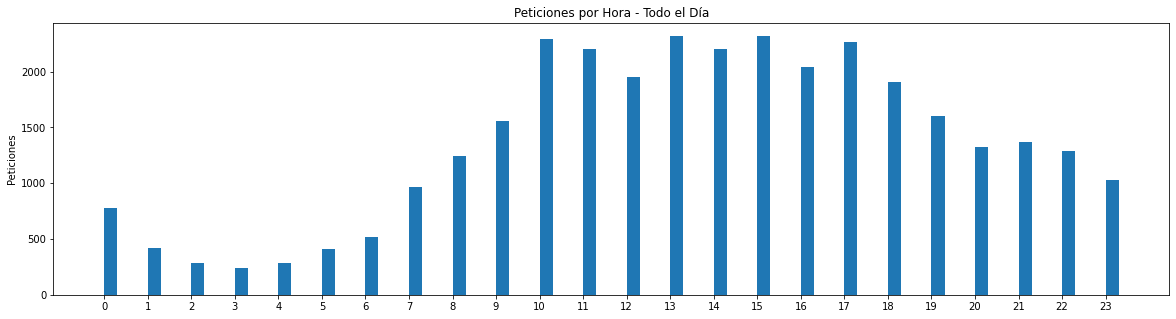

In [7]:
#@title Generación del Histograma
#@markdown Separaremos la función de probabilidad en dos <br>
#@markdown - 9 a 20hs
#@markdown - 20 a 9hs

graph(dictionary, "Peticiones por Hora - Todo el Día")

In [8]:
#@title Media, Varianza y Desvío Estandar
print_data(dictionary)

Media: 1366.750000
Varianza: 536166.354167
Desvío Estandar: 732.233811


In [9]:
#@title Reacomodamiento de timestamps

fr_0_9 =  [date for date in datetime_serie if date.hour < 9 ]
fr_9_19 = [date for date in datetime_serie if date.hour <= 19 and date.hour >= 9 ]
fr_19_0 = [date for date in datetime_serie if date.hour > 19 ]


dictionary_madrugada = ocurr_by_hour(fr_0_9)
dictionary_dia = ocurr_by_hour(fr_9_19)
dictionary_noche = ocurr_by_hour(fr_19_0)


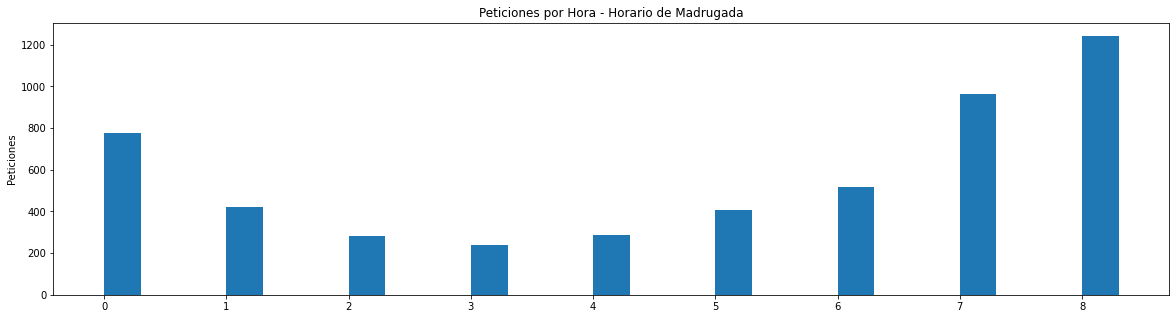

In [10]:
#@title Histograma - Horario de Madrugada
graph(dictionary_madrugada, "Peticiones por Hora - Horario de Madrugada")

In [11]:
#@title Media, Varianza y Desvío Estandar - Horario Madrugada
print_data(dictionary_madrugada)

Media: 570.555556
Varianza: 107784.246914
Desvío Estandar: 328.305113


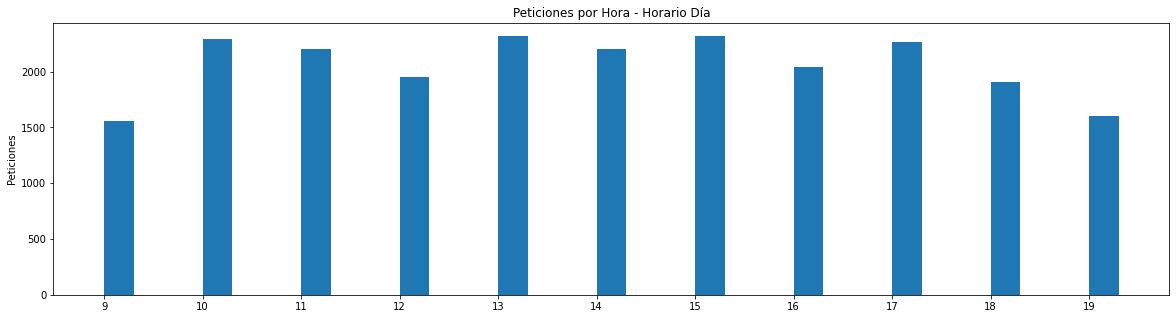

In [12]:
#@title Histograma - Horario Día
graph(dictionary_dia, "Peticiones por Hora - Horario Día")

In [13]:
#@title Media, Varianza y Desvío Estandar - Horario Pico
print_data(dictionary_dia)

Media: 2060.363636
Varianza: 70417.867769
Desvío Estandar: 265.363652


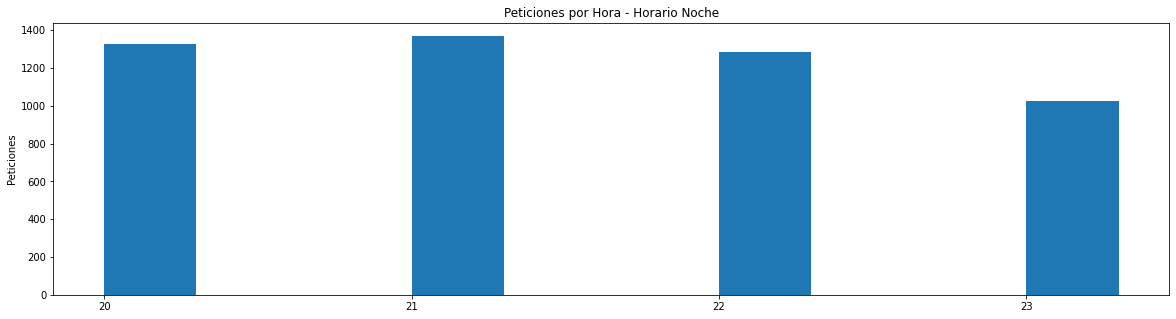

In [14]:
#@title Histograma - Horario Noche
graph(dictionary_noche, "Peticiones por Hora - Horario Noche")

In [15]:
#@title Media, Varianza y Desvío Estandar - Horario Noche
print_data(dictionary_noche)

Media: 1250.750000
Varianza: 18021.187500
Desvío Estandar: 134.243017


In [19]:
#@title Descargar archivos .xlsx para Kairos (Solo funciona en chrome o basados en chromium)

from google.colab import files

pd.Series(fr_0_9).to_excel('horario_madrugada.xlsx', index = False, header = False)
files.download('horario_madrugada.xlsx')

pd.Series(fr_9_19).to_excel('horario_dia.xlsx', index = False, header = False)
files.download('horario_dia.xlsx')

pd.Series(fr_19_0).to_excel('horario_noche.xlsx', index = False, header = False)
files.download('horario_noche.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from numpy import random

# Horario día

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.5726e^{-0.5726x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.5726}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.




In [38]:
def IA_dia():
  r = random.rand()
  return int(np.log(-r+1) / -0.5726)


In [73]:
print("***Generando 10 IA durante el día***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_dia())

***Generando 10 IA durante el día***

[*] IA: 0
[*] IA: 0
[*] IA: 2
[*] IA: 0
[*] IA: 0
[*] IA: 1
[*] IA: 0
[*] IA: 0
[*] IA: 0
[*] IA: 1


# Horario Noche

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.3479e^{-0.3479x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.3479}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.

In [55]:
def IA_noche():
  r = random.rand()
  return int(np.log(-r+1) / -0.3479)

In [72]:
print("***Generando 10 IA durante la noche***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_noche())

***Generando 10 IA durante la noche***

[*] IA: 6
[*] IA: 4
[*] IA: 7
[*] IA: 1
[*] IA: 1
[*] IA: 2
[*] IA: 4
[*] IA: 8
[*] IA: 2
[*] IA: 1


# Horario Madrugada

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.1588e^{-0.1588x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.1588}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.

In [61]:
def IA_madrugada():
  r = random.rand()
  return int(np.log(-r+1) / -0.1588)

In [70]:
print("***Generando 10 IA durante la madrugada***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_madrugada())

***Generando 10 IA durante la madrugada***

[*] IA: 15
[*] IA: 3
[*] IA: 17
[*] IA: 21
[*] IA: 10
[*] IA: 1
[*] IA: 4
[*] IA: 13
[*] IA: 10
[*] IA: 3
